# Generate firing rate RNN with endogenous (chaotic) activity with random matrices

#### Taku Ito

#### 03/15/21

#### Relevant citations: 

Sompolinsky, H., Crisanti, A., Sommers, H.J., 1988. Chaos in Random Neural Networks. Phys. Rev. Lett. 61, 259–262. https://doi.org/10.1103/PhysRevLett.61.259

Rajan, K., Abbott, L.F., Sompolinsky, H., 2010. Stimulus-dependent suppression of chaos in recurrent neural networks. Physical Review E 82, 11903. https://doi.org/10.1103/PhysRevE.82.011903

Stern, M., Sompolinsky, H., Abbott, L.F., 2014. Dynamics of random neural networks with bistable units. Physical Review E - Statistical, Nonlinear, and Soft Matter Physics 90, 1–7. https://doi.org/10.1103/PhysRevE.90.062710


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
% matplotlib inline
import seaborn as sns

#### Construct synaptic weight matrix for E-E

In [9]:
def constructRandomMatrices(n_neurons=1000, density=1.0, showplots=True):
    """
    n_neurons = Number 
    density = density of connections
    """

    K = n_neurons*density

    W = np.multiply(np.random.normal(loc=0,scale=1,size=(n_neurons,n_neurons)),np.random.rand(n_neurons,n_neurons)<density)
    
    W = W/np.sqrt(K)

    np.fill_diagonal(W,0)
    
    if showplots:
        plt.figure(figsize=(3,3))
        ax = sns.heatmap(W,center=0,square=True,cmap='bwr',cbar_kws={'fraction':0.046})
        ax.invert_yaxis()
        plt.title('Random connectivity matrix',fontsize=12);
        plt.xticks([0,n_neurons-1],[1,n_neurons],fontsize=10)
        plt.yticks([0,n_neurons-1],[1,n_neurons],fontsize=10)

    
    return W
    

## Model 

Stern et al. (2014)

$$\frac{dx_{i}}{dt} = -x_{i} + s \, \phi (x_i) +  g \, \sum_{j \neq i}^{N} W_{ij} \phi(x_{j}) + I_{i} $$



## Set simulation parameters

In [4]:
def runNetworkSimulation(W, n_neurons, density, I,
                         g=2.0, s=1.0,
                         Tmax=100, dt=0.01, tau=1.0, phi=np.tanh, showplots=True):
    """
    Wee = random connectivity matrix
    n_neurons = number of units
    density = desnity of connectivity
    g = Overall global coupling parameter
    s = self coupling
    Tmax = Number of total time
    dt = time steps
    phi = transfer function (default: np.phi)
    """

    T = np.arange(0, Tmax, dt)
    
    # Initial conditions and empty arrays
    X = np.zeros((n_neurons,len(T)))
    Xinit = np.random.rand(n_neurons,) # Initial conditions
    X[:,0] = Xinit

    for t in range(len(T)-1):
        # Solve using Euler Method
        k1 = -X[:,t]
        k1 += s * phi(X[:,t])
        k1 += g * np.dot(W,phi(X[:,t])) + I[:,t]
        k1 = k1/tau
        #
        X[:,t+1] = X[:,t] + k1*dt

    if showplots:
        ## Plot figures
        plt.figure(figsize=(3,3))
        ax = sns.heatmap(X,center=0,cbar_kws={'fraction':0.046})
        ax.invert_yaxis()
        plt.title('Firing rate',fontsize=12)
        plt.ylabel('Populations',fontsize=10)
        plt.xlabel('Time',fontsize=10)        
        plt.figure(figsize=(3,2))
        plt.title('Firing rate samples',fontsize=12)
        for i in range(5):
            plt.plot(X[i,:])

    return X


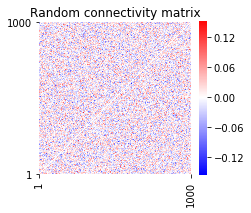

In [10]:
W = constructRandomMatrices(n_neurons=1000, density=1.0, showplots=True)


# Simulations


## Run simulation 1 -- spontaneous activity only

In [69]:
n_neurons = 1000
density = 1.0
Tmax = 100
dt = 0.01
T = np.arange(0,Tmax,dt)
I = np.ones((n_neurons,len(T))) * 0


W = constructRandomMatrices(n_neurons=n_neurons, density=density, showplots=False)

X = runNetworkSimulation(W, n_neurons, density, I,
                         g=2.0, s=1.0,
                         Tmax=100, dt=0.01, tau=1.0, phi=np.tanh, showplots=False)

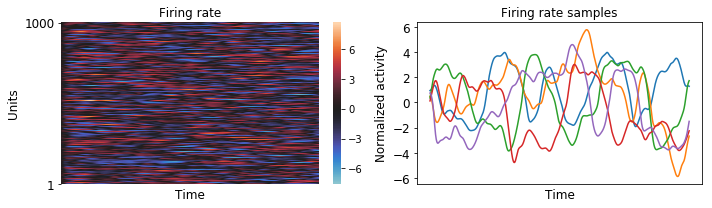

In [70]:
plt.figure(figsize=(10,3))
plt.subplot(121)
ax = sns.heatmap(X,center=0,cbar_kws={'fraction':0.046})
ax.invert_yaxis()
plt.title('Firing rate',fontsize=12)
plt.ylabel('Units',fontsize=12)
plt.xlabel('Time',fontsize=12)
plt.xticks([])
plt.yticks([0,999],[1,1000],fontsize=12)

plt.subplot(122)
plt.title('Firing rate samples',fontsize=12)
for i in range(5):
    plt.plot(X[i,:])
plt.xlabel('Time',fontsize=12)
plt.ylabel('Normalized activity',fontsize=12)
plt.xticks([])
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig('SpontaneousActivity.png',dpi=300)

## Run simulation 2a -- spontaneous activity + fixed input activity

In [71]:
n_neurons = 1000
density = 1.0
Tmax = 100
dt = 0.01
T = np.arange(0,Tmax,dt)
I = np.ones((n_neurons,len(T))) * 1


X = runNetworkSimulation(W, n_neurons, density, I,
                         g=2.0, s=1.0,
                         Tmax=100, dt=0.01, tau=1.0, phi=np.tanh, showplots=False)

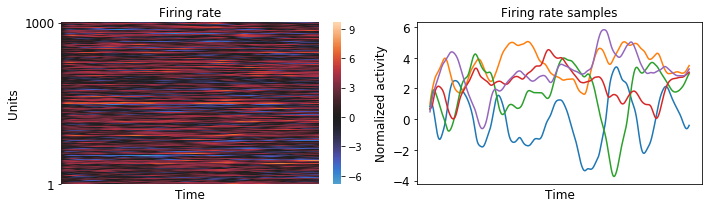

In [72]:
plt.figure(figsize=(10,3))
plt.subplot(121)
ax = sns.heatmap(X,center=0,cbar_kws={'fraction':0.046})
ax.invert_yaxis()
plt.title('Firing rate',fontsize=12)
plt.ylabel('Units',fontsize=12)
plt.xlabel('Time',fontsize=12)
plt.xticks([])
plt.yticks([0,999],[1,1000],fontsize=12)

plt.subplot(122)
plt.title('Firing rate samples',fontsize=12)
for i in range(5):
    plt.plot(X[i,:])
plt.xlabel('Time',fontsize=12)
plt.ylabel('Normalized activity',fontsize=12)
plt.xticks([])
plt.yticks(fontsize=12)
    
plt.tight_layout()
plt.savefig('WeakFixedInput.png',dpi=300)

## Run simulation 2b -- spontaneous activity + fixed input activity (more amplitude)

In [73]:
n_neurons = 1000
density = 1.0
Tmax = 100
dt = 0.01
T = np.arange(0,Tmax,dt)
I = np.ones((n_neurons,len(T))) * 3


X = runNetworkSimulation(W, n_neurons, density, I,
                         g=2.0, s=1.0,
                         Tmax=100, dt=0.01, tau=1.0, phi=np.tanh, showplots=False)

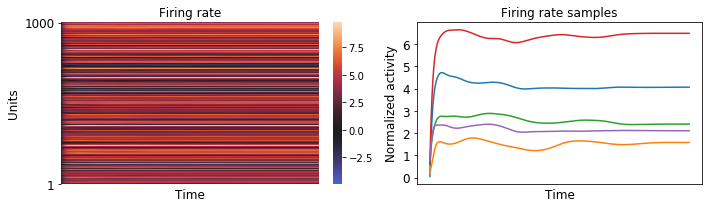

In [74]:
plt.figure(figsize=(10,3))
plt.subplot(121)
ax = sns.heatmap(X,center=0,cbar_kws={'fraction':0.046})
ax.invert_yaxis()
plt.title('Firing rate',fontsize=12)
plt.ylabel('Units',fontsize=12)
plt.xlabel('Time',fontsize=12)
plt.xticks([])
plt.yticks([0,999],[1,1000],fontsize=12)

plt.subplot(122)
plt.title('Firing rate samples',fontsize=12)
for i in range(5):
    plt.plot(X[i,:])
plt.xlabel('Time',fontsize=12)
plt.ylabel('Normalized activity',fontsize=12)
plt.xticks([])
plt.yticks(fontsize=12)
    
plt.tight_layout()
plt.savefig('StrongFixedInput.png',dpi=300)

## Run simulation 3a -- spontaneous activity + sinusoidal activity

In [75]:
n_neurons = 1000
density = 1.0
Tmax = 100
dt = 0.01
T = np.arange(0,Tmax,dt)
I_sin = np.sin(T)
I_sin.shape = (1,len(I_sin))
I = np.repeat(I_sin,n_neurons,axis=0)



X = runNetworkSimulation(W, n_neurons, density, I,
                         g=2.0, s=1.0,
                         Tmax=100, dt=0.01, tau=1.0, phi=np.tanh, showplots=False)

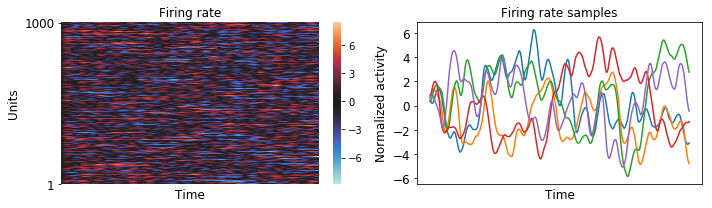

In [76]:
plt.figure(figsize=(10,3))
plt.subplot(121)
ax = sns.heatmap(X,center=0,cbar_kws={'fraction':0.046})
ax.invert_yaxis()
plt.title('Firing rate',fontsize=12)
plt.ylabel('Units',fontsize=12)
plt.xlabel('Time',fontsize=12)
plt.xticks([])
plt.yticks([0,999],[1,1000],fontsize=12)

plt.subplot(122)
plt.title('Firing rate samples',fontsize=12)
for i in range(5):
    plt.plot(X[i,:])
plt.xlabel('Time',fontsize=12)
plt.ylabel('Normalized activity',fontsize=12)
plt.xticks([])
plt.yticks(fontsize=12)
    
plt.tight_layout()
plt.savefig('WeakSinusoidInput.png',dpi=300)

## Run simulation 3b -- spontaneous activity + sinusoidal activity (high amplitude)

In [77]:
n_neurons = 1000
density = 1.0
Tmax = 100
dt = 0.01
T = np.arange(0,Tmax,dt)
I_sin = np.sin(T)
I_sin.shape = (1,len(I_sin))
I = np.repeat(I_sin,n_neurons,axis=0)*3



X = runNetworkSimulation(W, n_neurons, density, I,
                         g=2.0, s=1.0,
                         Tmax=100, dt=0.01, tau=1.0, phi=np.tanh, showplots=False)

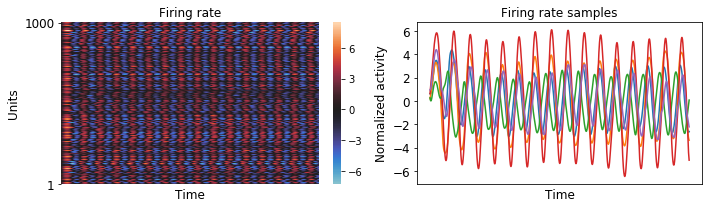

In [78]:
plt.figure(figsize=(10,3))
plt.subplot(121)
ax = sns.heatmap(X,center=0,cbar_kws={'fraction':0.046})
ax.invert_yaxis()
plt.title('Firing rate',fontsize=12)
plt.ylabel('Units',fontsize=12)
plt.xlabel('Time',fontsize=12)
plt.xticks([])
plt.yticks([0,999],[1,1000],fontsize=12)

plt.subplot(122)
plt.title('Firing rate samples',fontsize=12)
for i in range(5):
    plt.plot(X[i,:])
plt.xlabel('Time',fontsize=12)
plt.ylabel('Normalized activity',fontsize=12)
plt.xticks([])
plt.yticks(fontsize=12)
    
plt.tight_layout()
plt.savefig('StrongSinusoidInput.png',dpi=300)